C:\Users\btulu\AppData\Local\Temp\ipykernel_13284\2512707793.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'])
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9010
Model:                 ARIMA(1, 0, 0)   Log Likelihood               20263.739
Date:                Sat, 02 Aug 2025   AIC                         -40521.478
Time:                        13:27:56   BIC                         -40500.159
Sample:                             0   HQIC                        -40514.224
                               - 9010                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.636      0.525      -0.000       0.001
ar.L1         -0.0138      0.002     -6.296      0.000      -0.018      -0.010
sigma2         0.0007   1.72e-06    378.127      0.0

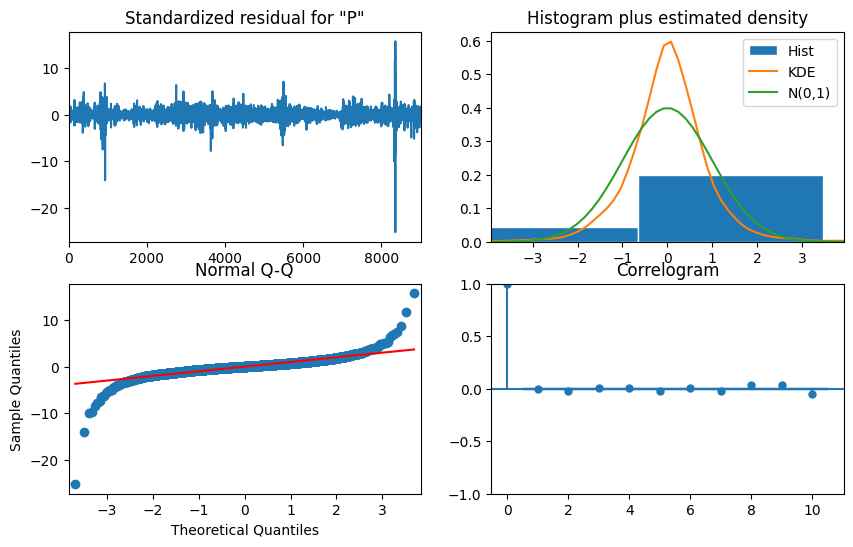

In [7]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Load and prepare data
df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
prices = df['Price']
log_returns = np.log(prices).diff().dropna()
returns_values = log_returns.values

# Fit ARIMA model (or any time series model)
model = sm.tsa.ARIMA(log_returns, order=(1, 0, 0))  # AR(1) model
results = model.fit()

# Print summary and plot
print(results.summary())
results.plot_diagnostics(figsize=(10, 6))
plt.show()


C:\Users\btulu\AppData\Local\Temp\ipykernel_13284\974752386.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'])


Estimated change point index: 8359


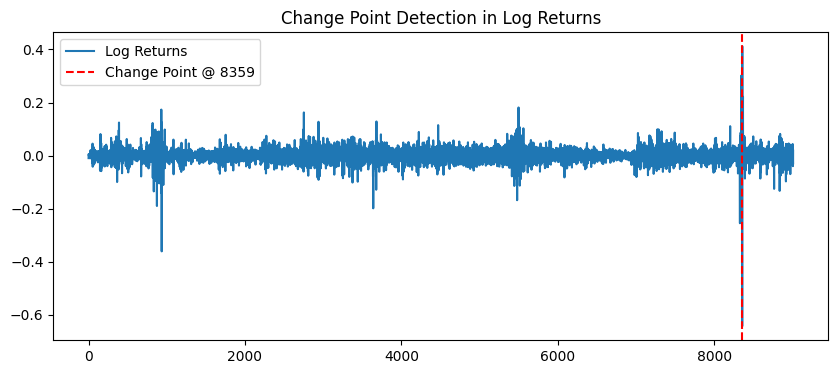

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load and prepare data
df = pd.read_csv('BrentOilPrices.csv', parse_dates=['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)
prices = df['Price']
log_returns = np.log(prices).diff().dropna().values
N = len(log_returns)
idx = np.arange(N)

# Change point detection by minimizing total RSS
def compute_total_rss(tau):
    # Fit model before change point
    X_pre = sm.add_constant(idx[:tau])
    model_pre = sm.OLS(log_returns[:tau], X_pre).fit()
    rss_pre = sum(model_pre.resid ** 2)

    # Fit model after change point
    X_post = sm.add_constant(idx[tau:])
    model_post = sm.OLS(log_returns[tau:], X_post).fit()
    rss_post = sum(model_post.resid ** 2)

    return rss_pre + rss_post

# Search for optimal change point
rss_scores = [compute_total_rss(t) for t in range(10, N - 10)]
best_tau = np.argmin(rss_scores) + 10  # Add 10 to correct offset
print(f"Estimated change point index: {best_tau}")

# Plot result
plt.figure(figsize=(10, 4))
plt.plot(idx, log_returns, label='Log Returns')
plt.axvline(best_tau, color='red', linestyle='--', label=f'Change Point @ {best_tau}')
plt.legend()
plt.title("Change Point Detection in Log Returns")
plt.show()


Estimated change point date: 2020-04-21


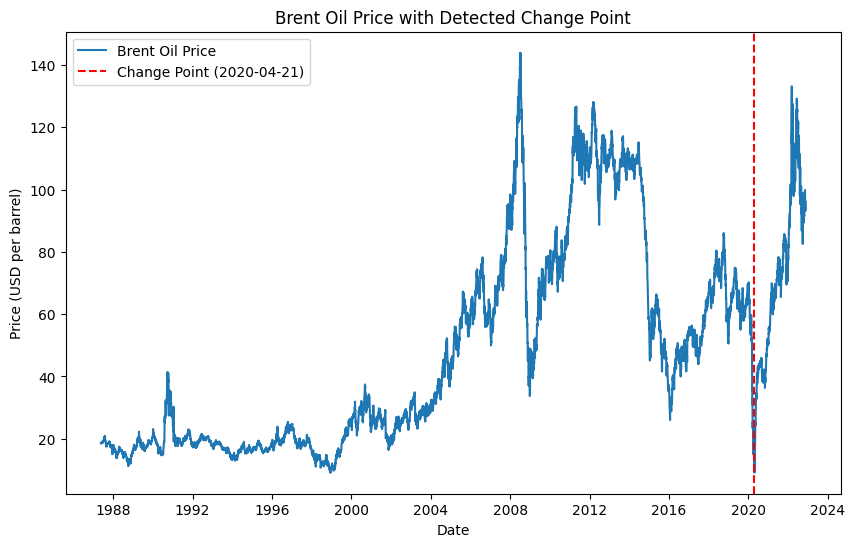

In [11]:
# Get the change point date from index
cp_date = df.index[best_tau]
print(f"Estimated change point date: {cp_date.date()}")

# Plot the price series with the detected change point
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Price'], label='Brent Oil Price')
plt.axvline(cp_date, color='red', linestyle='--', label=f'Change Point ({cp_date.date()})')
plt.title('Brent Oil Price with Detected Change Point')
plt.xlabel('Date')
plt.ylabel('Price (USD per barrel)')
plt.legend()
plt.show()
